In [2]:
import keras
keras.__version__

'2.7.0'

In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 데이터에서 가장 자주 등장하는 단어 1만 개로 제한

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
print(len(train_data))
print(len(test_data))

8982
2246


In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 index 이므로 3을 뺌

decoded_newswrite = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
decoded_newswrite

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
# 레이블을 벡터로 바꾸는 방법은 두 가지
# 1. 레이블의 리스트를 정수 텐서로 변환
# 2. 원-핫 인코딩을 사용
# 원-핫 인코딩이 범주형 데이터에 널리 사용되기 때문에 범주형 인코딩이라고 불림
# 이 경우 레이블의 원-핫 인코딩은 각 레이블의 인덱스 자리는 1 이고 나머지는 모두 0 인 벡터임

In [11]:
import numpy as np

def vectorize_sequences(sequence, dimension=10000):
  results = np.zeros((len(sequence), dimension))
  for i, sequence in enumerate(sequence):
    results[i, sequence] =1.
  return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)

# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [12]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)

# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
# 위 구조에서 두 가지 주목해야할 점
# 1. 마지막 Dense 층의 크기가 46, 각 입력 샘플에 대해서 46차원의 벡터를 출력한다는 뜻
# 1. 벡터의 각 원소(각 차원)은 각기 다른 출력 클래스가 인코딩된 것
# 2. 마지막 층에 softmax 활성화 함수가 사용 됨. 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력
# 2. 46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i 에 속할 확률
# 2. 46개의 값을 모두 더하면 1 이 됨

In [16]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 이런 문제에 사용할 최선의 손실 함수는 'categorical_crossentropy'가 됨.
# 두 확률 분포 사이의 거리를 측정하기 때문
# 네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리
# 두 분포 사이의 거리를 최소화하면 진자 레이블에 가능한 가까운 출력을 내도록 모델을 훈련하게 됨

In [17]:
# 훈련 데이터에서 1000개의 샘플을 따로 떼어 검증 세트로 사용
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 81ms/step - loss: 2.6443 - accuracy: 0.5213 - val_loss: 1.7475 - val_accuracy: 0.6490
Epoch 2/20
16/16 [==============================] - 1s 67ms/step - loss: 1.4161 - accuracy: 0.7161 - val_loss: 1.2950 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 63ms/step - loss: 1.0339 - accuracy: 0.7863 - val_loss: 1.1114 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 58ms/step - loss: 0.8078 - accuracy: 0.8353 - val_loss: 1.0103 - val_accuracy: 0.7900
Epoch 5/20
16/16 [==============================] - 1s 58ms/step - loss: 0.6398 - accuracy: 0.8730 - val_loss: 0.9304 - val_accuracy: 0.8140
Epoch 6/20
16/16 [==============================] - 1s 60ms/step - loss: 0.5078 - accuracy: 0.8988 - val_loss: 0.9216 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 61ms/step - loss: 0.4066 - accuracy: 0.9183 - val_loss: 0.8976 - val_accuracy: 0.8060
Epoch 8/20
16

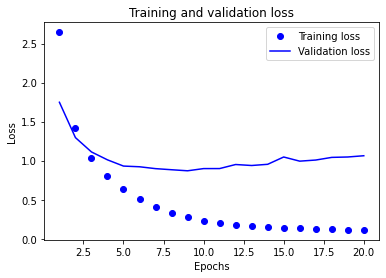

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

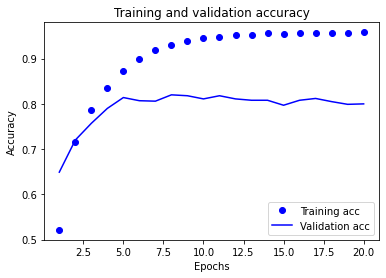

In [21]:
plt.clf() # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# 해당 모델은 9번째 epochs 이후에 과대적합이 시작 되므로
# 9번의 epochs 로 새로운 모델을 훈련하고 테스트 세트에서 평가

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 82ms/step - loss: 2.5136 - accuracy: 0.5365 - val_loss: 1.6229 - val_accuracy: 0.6570
Epoch 2/9
16/16 [==============================] - 1s 76ms/step - loss: 1.3460 - accuracy: 0.7185 - val_loss: 1.2720 - val_accuracy: 0.7170
Epoch 3/9
16/16 [==============================] - 1s 71ms/step - loss: 1.0104 - accuracy: 0.7846 - val_loss: 1.1113 - val_accuracy: 0.7670
Epoch 4/9
16/16 [==============================] - 1s 73ms/step - loss: 0.7912 - accuracy: 0.8339 - val_loss: 1.0121 - val_accuracy: 0.7920
Epoch 5/9
16/16 [==============================] - 1s 66ms/step - loss: 0.6273 - accuracy: 0.8690 - val_loss: 0.9670 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 1s 70ms/step - loss: 0.5019 - accuracy: 0.8941 - val_loss: 0.9167 - val_accuracy: 0.8180
Epoch 7/9
16/16 [==============================] - 1s 72ms/step - loss: 0.3949 - accuracy: 0.9168 - val_loss: 0.9126 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [23]:
results

[1.0273208618164062, 0.7809438705444336]

In [ ]:
# 대략 78% 정도의 정확도가 나옴
# 이진 분류 문제에서 완전히 무작위로 분류하면 50%의 정확도를 달성한다고 함
# 불균형한 데이터셋을 사용하므로 무작위로 분류하면 19% 정도가 달성된다고 보면
# 결과는 꽤 좋은 편

In [24]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1918967052537845

## 새로운 데이터에 대해 예측

In [25]:
predictions = model.predict(x_test)

print(predictions[0].shape)

print(np.sum(predictions[0]))

print(np.argmax(predictions[0]))

(46,)
1.0000001
4


## 레이블과 손실을 다루는 다른 방법

In [26]:
# 앞서 언급한 것처럼 레이블을 인코딩하는 다른 방법은 다음과 같이 정수 텐서로 변환
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# 이 방식을 사용하려면 손실 함수 하나만 바꾸면 됨
# 정수 레이블을 사용할 때는 sparse_categorical_crossentropy 를 사용

In [27]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 이 손실 함수는 인터페이스만 다를 뿐,  수학적으로 categorical_crossentropy 와 동일

## 충분히 큰 중간층을 두어야 하는 이유

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 3.2648 - accuracy: 0.2112 - val_loss: 2.5333 - val_accuracy: 0.5040
Epoch 2/20
63/63 [==============================] - 1s 19ms/step - loss: 1.9008 - accuracy: 0.5666 - val_loss: 1.6513 - val_accuracy: 0.6080
Epoch 3/20
63/63 [==============================] - 1s 19ms/step - loss: 1.3981 - accuracy: 0.6565 - val_loss: 1.4903 - val_accuracy: 0.6280
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 1.1865 - accuracy: 0.7027 - val_loss: 1.3868 - val_accuracy: 0.6840
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 1.0340 - accuracy: 0.7565 - val_loss: 1.3754 - val_accuracy: 0.6970
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 0.9222 - accuracy: 0.7809 - val_loss: 1.3114 - val_accuracy: 0.7120
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 0.8349 - accuracy: 0.7982 - val_loss: 1.3164 - val_accuracy: 0.7150
Epoch 8/20
63

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 26ms/step - loss: 3.0595 - accuracy: 0.2175 - val_loss: 2.4693 - val_accuracy: 0.2690
Epoch 2/20
63/63 [==============================] - 1s 24ms/step - loss: 1.9866 - accuracy: 0.5164 - val_loss: 1.6106 - val_accuracy: 0.6430
Epoch 3/20
63/63 [==============================] - 1s 23ms/step - loss: 1.3555 - accuracy: 0.6745 - val_loss: 1.3797 - val_accuracy: 0.6710
Epoch 4/20
63/63 [==============================] - 1s 22ms/step - loss: 1.1533 - accuracy: 0.6954 - val_loss: 1.3206 - val_accuracy: 0.6730
Epoch 5/20
63/63 [==============================] - 1s 23ms/step - loss: 1.0296 - accuracy: 0.7145 - val_loss: 1.2954 - val_accuracy: 0.6890
Epoch 6/20
63/63 [==============================] - 2s 24ms/step - loss: 0.9336 - accuracy: 0.7600 - val_loss: 1.2747 - val_accuracy: 0.6960
Epoch 7/20
63/63 [==============================] - 2s 24ms/step - loss: 0.8514 - accuracy: 0.7777 - val_loss: 1.2733 - val_accuracy: 0.7150
Epoch 8/20
63

In [30]:
# 검증 정확도의 최고 값이 약 71% 로 8% 정도 감소 됨
# 이런 손실의 대부분 원인은 많은 정보(46개 클래스의 분할 초평면을 복원하기에 충분한 정보)를
# 중간층의 저차원 표현 공간으로 압축하려고 했기 때문
# 이 네트워크는 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못함